## Moving Average Models - MA(q)

MA(q) models are very similar to AR(p) models. MA(q) model is a linear combination of past error terms as opposed to a linear combination of past observations like the AR(p) model. The motivation for the MA model is that we can explain "shocks" in the error process directly by fitting a model to the error terms. (In an AR(p) model these shocks are observed indirectly by using past observations) 

$$x_t=w_t+\beta_1w_{t-1}+…+\beta_qw_{t-q}$$ 

Where $w_t$ is white noise with $E(w_t)=0$ and variance $\sigma^2$

By definition, ACF $\rho_k$ should be zero for k>q.

Let's simulate this process using $\beta$=0.6 and specifying the AR(p) $\alpha$ equal to 0.

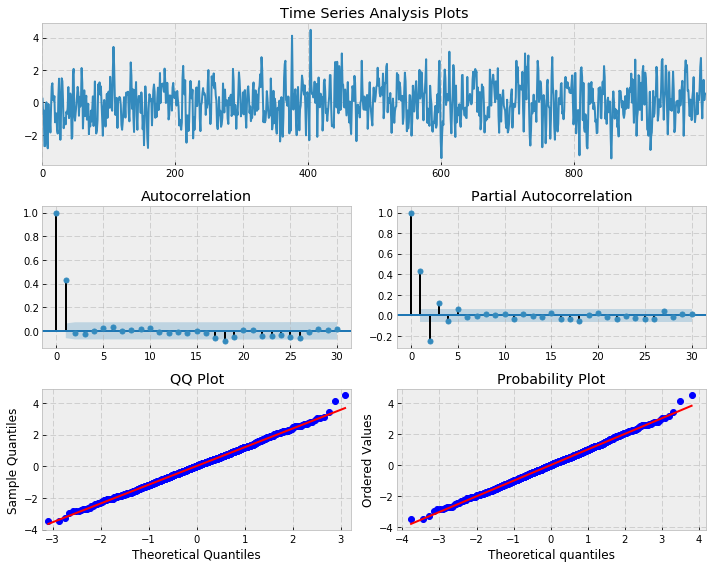

In [54]:
# Simulate an MA(1) process

n = int(1000)

# set the AR(p) alphas equal to 0
alphas = np.array([0.])
betas = np.array([0.6])

# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ma1, lags=30)

Since q=1, we expect a significant peak at k=1 at ACF and then insignificant peaks subsequent to that. 

Just like we use PACF for AR(p) models, this is a useful way of seeing whether an MA(q) model is appropriate. By taking a look at the ACF of a particular series we can see how many sequential non-zero lags exist. If q such lags exist then we can legitimately attempt to fit a MA(q) model to a particular series.

The ACF function shows that lag 1 is significant which indicates that a MA(1) model may be appropriate for our simulated series. We can now attempt to fit a MA(1) model to our simulated data. 

In [55]:
# Fit the MA(1) model to our simulated time series
# Specify ARMA model with order (p, q)

max_lag = 30
mdl = smt.ARMA(ma1, order=(0, 1)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1442.974
Method:                           mle   S.D. of innovations              1.024
Date:                Mon, 27 Feb 2017   AIC                           2889.949
Time:                        21:25:57   BIC                           2899.764
Sample:                             0   HQIC                          2893.679
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5729      0.025     22.791      0.000       0.524       0.622
                                    Roots                                    
                 Real           Imaginary           M

The model was able to correctly estimate the lag coefficent as 0.58 is close to our true value of 0.6. Also notice that our 95% confidence interval does contain the true value. 

In [57]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

The residuals seem normally distributed.


Let's try simulating an MA(3)  process, then try to fit a third order MA model to the series and see if we can recover the correct lag coefficients ($\beta s$). Betas 1-3 are equal to 0.3, 0.2, and 0.1 respectively.
This time we should expect significant peaks at k = {1,2,3}, and insignificant peaks for k>3 in ACF plots.

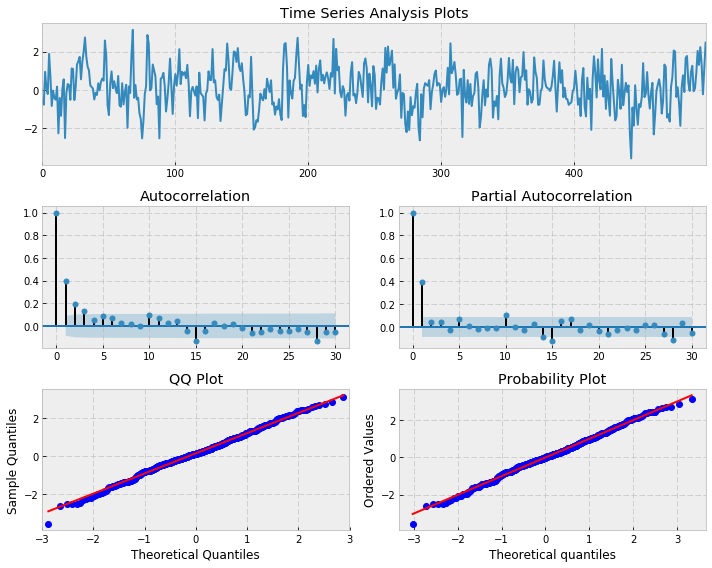

In [58]:
# Simulate MA(3) process with betas 0.3, 0.2, 0.1

n = int(500)
alphas = np.array([0.])
betas = np.array([0.3, 0.2, 0.1])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = tsplot(ma3, lags=30)

In [59]:
# Fit MA(3) model to simulated time series

max_lag = 30
mdl = smt.ARMA(ma3, order=(0, 3)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(0, 3)   Log Likelihood                -698.240
Method:                           mle   S.D. of innovations              0.978
Date:                Mon, 27 Feb 2017   AIC                           1404.481
Time:                        21:26:34   BIC                           1421.339
Sample:                             0   HQIC                          1411.096
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.3908      0.045      8.729      0.000       0.303       0.479
ma.L2.y        0.1834      0.048      3.826      0.000       0.089       0.277
ma.L3.y        0.1252      0.042      2.993      0.0

In [60]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

The residuals seem normally distributed.


The model was able to estimate the real coefficients effectively. Our 95% confidence intervals also contain the true parameter values of 0.3, 0.2, and 0.1. 

Now let's follow the earlier exercise and fit a MA(1) model to the AAPL log returns and plot residuals again. Keep in mind we do not know the true parameter values.

                              ARMA Model Results                              
Dep. Variable:                   AAPL   No. Observations:                 2015
Model:                     ARMA(0, 1)   Log Likelihood                4841.443
Method:                           mle   S.D. of innovations              0.022
Date:                Mon, 27 Feb 2017   AIC                          -9678.886
Time:                        21:26:48   BIC                          -9667.670
Sample:                    12-29-2006   HQIC                         -9674.769
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.AAPL     0.0026      0.023      0.110      0.912      -0.043       0.048
                                    Roots                                    
                 Real           Imaginary           M

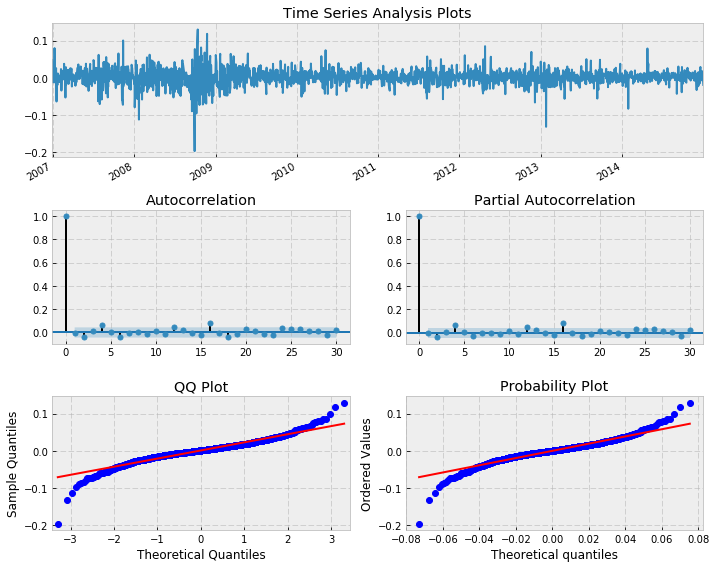

In [61]:
# Fit MA(1) to AAPL log returns

max_lag = 30
Y = lrets.AAPL
mdl = smt.ARMA(Y, order=(0, 1)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)

We see some significant peaks at k=4, k=11 and k=16. Let's try MA(2)

                              ARMA Model Results                              
Dep. Variable:                   AAPL   No. Observations:                 2015
Model:                     ARMA(0, 2)   Log Likelihood                4842.456
Method:                           mle   S.D. of innovations              0.022
Date:                Mon, 27 Feb 2017   AIC                          -9678.912
Time:                        21:26:53   BIC                          -9662.087
Sample:                    12-29-2006   HQIC                         -9672.737
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.AAPL     0.0032      0.022      0.143      0.886      -0.040       0.047
ma.L2.AAPL    -0.0298      0.021     -1.423      0.155      -0.071       0.011
                                    Roots           

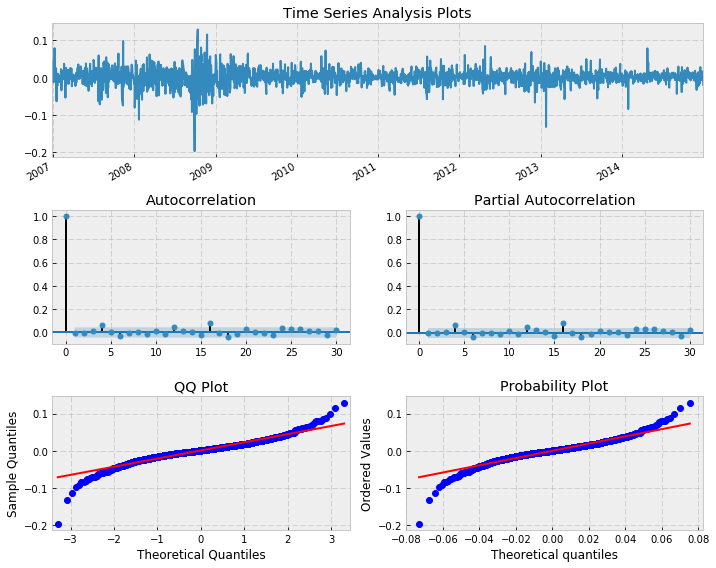

In [62]:
# Fit MA(2) to AAPL log returns

max_lag = 30
Y = lrets.AAPL
mdl = smt.ARMA(Y, order=(0, 2)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)

We see marginally significant peaks at k=4, k=16. This is suggestive that the MA(2) model is capturing a lot of the autocorrelation, but not all of the long-memory effects. We could keep increasing the order, but we'd still notice these peaks because we'll be adding a new parameter to a model that has seemingly explained away much of the correlations at shorter lags, but that won't have much of an effect on the longer term lags.

All of this evidence is suggestive of the fact that an MA(q) model is unlikely to be useful in explaining all of the serial correlation in isolation, at least for AAPL.

In [63]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

We have reason to suspect the residuals are not normally distributed.


Let's also try to fit a MA(3) model to the SPX log returns and plot residuals again. 

                              ARMA Model Results                              
Dep. Variable:                    SPX   No. Observations:                 2015
Model:                     ARMA(0, 3)   Log Likelihood                5754.538
Method:                           mle   S.D. of innovations              0.014
Date:                Mon, 27 Feb 2017   AIC                         -11501.075
Time:                        21:07:50   BIC                         -11478.642
Sample:                    12-29-2006   HQIC                        -11492.841
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.SPX     -0.1193      0.022     -5.366      0.000      -0.163      -0.076
ma.L2.SPX     -0.0515      0.023     -2.246      0.025      -0.096      -0.007
ma.L3.SPX      0.0308      0.022      1.410      0.1

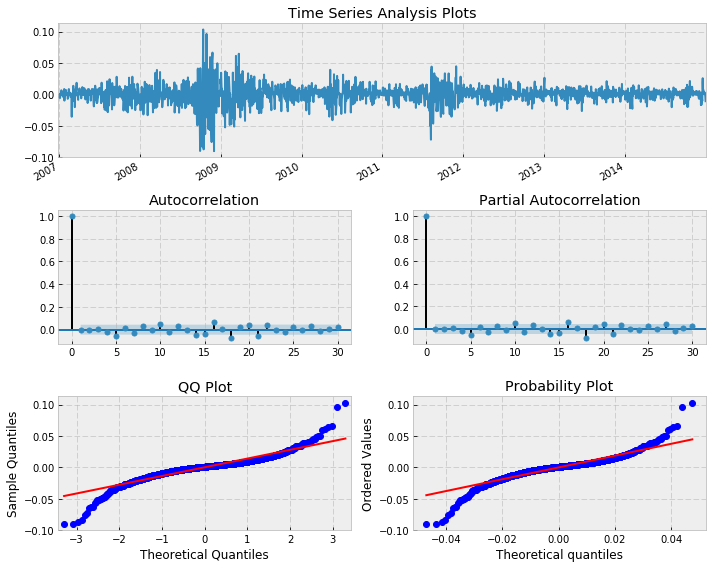

In [50]:
# Fit MA(3) to SPX log returns

max_lag = 30
Y = lrets.SPX
mdl = smt.ARMA(Y, order=(0, 3)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)

We see significant peaks at many longer lags in the residuals. Once again, we find the MA(3) model is not a good fit.

In [64]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)

if pvalue < 0.10:
    print 'We have reason to suspect the residuals are not normally distributed.'
else:
    print 'The residuals seem normally distributed.'

We have reason to suspect the residuals are not normally distributed.


We've now examined two major time series models in detail, namely the Autogressive model of order p, AR(p) and then Moving Average of order q, MA(q). We've seen that they're both capable of explaining away some of the autocorrelation in the residuals of first order differenced daily log prices of equities and indices, but volatility clustering and long-memory effects persist.

It is finally time to turn our attention to the combination of these two models, namely the Autoregressive Moving Average of order p,q, ARMA(p,q) to see if it will improve the situation any further.